# **Maternal Health Risk Study B**

## Objectives

* Answer Buisiness requirement 1. Carry out descriptive analytics on the maternal health dataset.
  
## Inputs

* The maternal health dataset from outputs/datasets/collection/maternal-healt-dataset.csv

## Outputs

* Code to answer business requirement 1 and to use to build a Streamlit dashboard
* Plots to visualise the analysis

## Additional Comments
* This is the second part of the maternal health risk study and contains further exploratory data analysis of selected variables with notable correlation levels to the target.
* It contains a parallel categorical plot that will be used in the streamlist app
* See part A of this notebook for the rest of the analysis (EDA, outlier and correlation study)

---

# Import Packages for Data Collection

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from feature_engine.discretisation import ArbitraryDiscretiser

%matplotlib inline

# Change working directory

We need to change the working directory from its current folder to its parent folder
* Access current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/ML-maternal-health-risk/jupyter_notebooks'

Make the parent of the current directory the new current directory, and confirm new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory
* os.getcwd() get the current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(f"New current directory set to {current_dir}.")

New current directory set to /workspaces/ML-maternal-health-risk.


# Load Data

In [4]:
df = pd.read_csv('outputs/datasets/collection/maternal-health-risk-dataset.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,2
1,35,140,90,13.0,36.7,70,2
2,29,90,70,8.0,37.8,80,2
3,30,140,85,7.0,36.7,70,2
4,35,120,60,6.1,36.7,76,0


In the previous notebook we found the four most correlated variables to the target RiskLevel.

Here we store the variables we want to study in corr_vars_study.

In [5]:
corr_vars_spearman = df.corr(method='spearman')["RiskLevel"].sort_values(key=abs, ascending=False).drop("RiskLevel")
corr_vars_study = corr_vars_spearman[:4].index.to_list()
corr_vars_study 

['BloodSugar', 'SystolicBP', 'DiastolicBP', 'Age']

---

# Further data analysis on variables with relevant correlation

In this section we investigate the relationship between the selected variables and the RiskLevel in more detail and visualize the distributions of the variables by RiskLevel.

We start by assigning the relevant data to a new dataframe.

In [6]:
corr_vars_study.append("RiskLevel")
corr_vars_study

['BloodSugar', 'SystolicBP', 'DiastolicBP', 'Age', 'RiskLevel']

In [7]:
df_select = df.filter(corr_vars_study)
df_select.head()

,BloodSugar,SystolicBP,DiastolicBP,Age,RiskLevel
0,15.0,130,80,25,2
1,13.0,140,90,35,2
2,8.0,90,70,29,2
3,7.0,140,85,30,2
4,6.1,120,60,35,0


## Distribution by RiskLevel for each Variable

We plot each variable against the RiskLevel target to visualise their distributions.

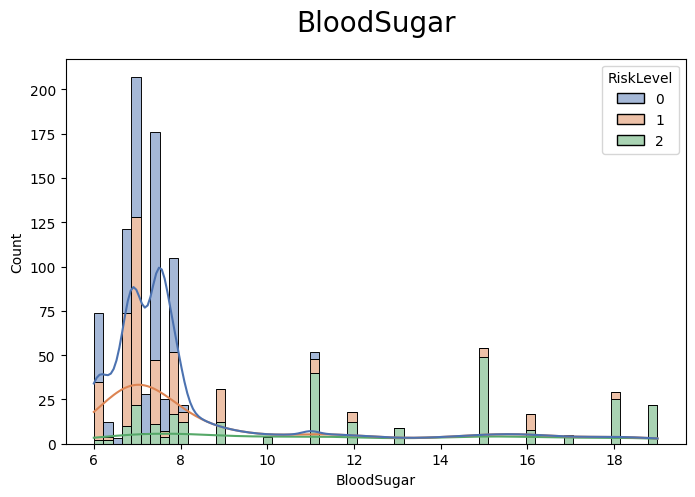

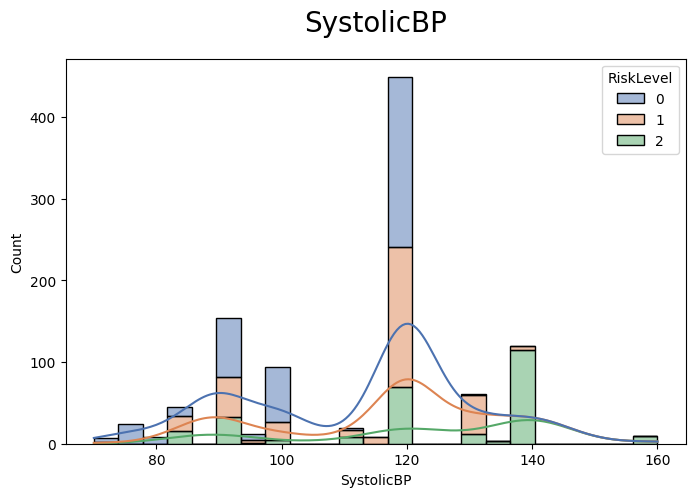

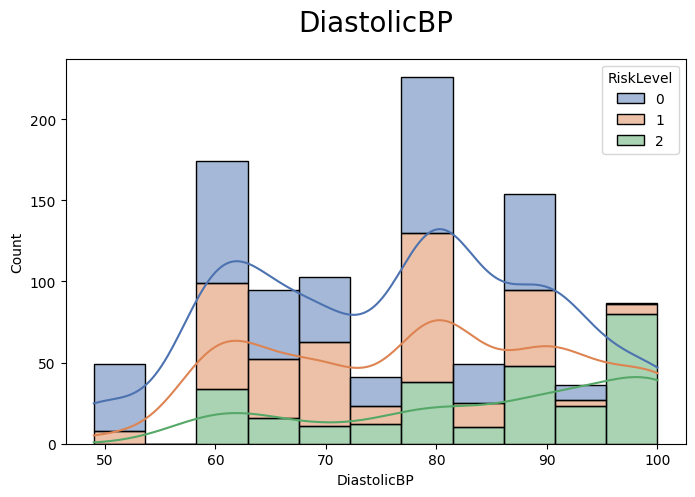

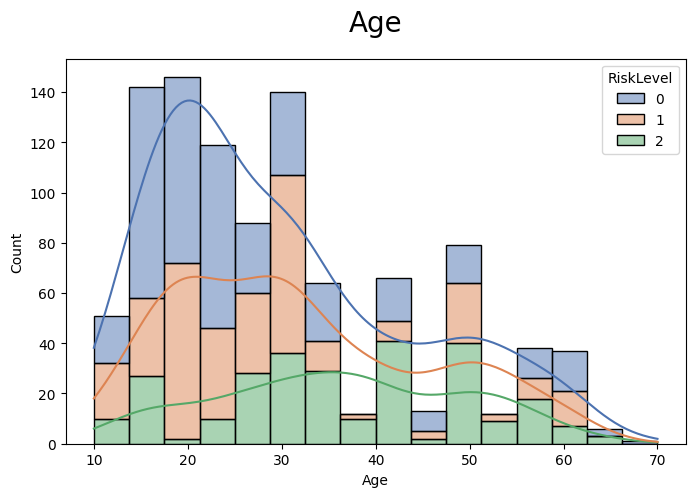

In [8]:
for var in corr_vars_study[:-1]:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df_select, x=var, hue="RiskLevel", kde=True, element="bars", multiple="stack", palette="deep")
    plt.title(f"{var}", fontsize=20, y=1.05)

The plots visualise what we have already seen in the analysis above.

### Parallel Plot

Let us also create an interactive parallel plot to visualise even clearer how each of the variables tend to be related to low, mid or high risk.

Since all features are numerical and continuous, a plot would not be very interpretable. We thus want to categorise the variables in a way that makes it more interpretable with a parallel plot.

Before categorising the data let us look at the statistical summary again:

In [9]:
df_select.describe()

,BloodSugar,SystolicBP,DiastolicBP,Age,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,8.725986,113.198225,76.460552,29.871795,0.867850
std,3.293532,18.403913,13.885796,13.474386,0.807353
min,6.000000,70.000000,49.000000,10.000000,0.000000
25%,6.900000,100.000000,65.000000,19.000000,0.000000
50%,7.500000,120.000000,80.000000,26.000000,1.000000
75%,8.000000,120.000000,90.000000,39.000000,2.000000
max,19.000000,160.000000,100.000000,70.000000,2.000000


We now choose categories for each of the four numerical features and store it in a new dataframe. It takes some trial and error to find categories that are useful for the parallel plot.

In [ ]:
blood_sugar_map = [-np.inf, 6.8, 7, 7.5, 8, np.inf]
systolic_bp_map = [-np.inf, 90, 110, 120, np.inf]
diastolic_bp_map = [-np.inf, 60, 70, 80, 90, np.inf]
age_map = [-np.inf, 18, 24, 30, 40, np.inf]

# Use ArbritaryDiscretiser from feature_engine and specify the category ranges
disc = ArbitraryDiscretiser(binning_dict={"BloodSugar": blood_sugar_map, "SystolicBP": systolic_bp_map, "DiastolicBP": diastolic_bp_map, "Age": age_map})

# Store data in a new dataframe
df_parallel = disc.fit_transform(df_select)
df_parallel.head()

Create maps to label the categories

In [ ]:
# Code inspiration from Code Institute churnometer walkthrough project, adapted from only one to several variables

vars_cat = ["BloodSugar", "SystolicBP", "DiastolicBP", "Age"]
n_classes_list = [len(blood_sugar_map) - 1, len(systolic_bp_map) - 1, len(diastolic_bp_map) - 1, len(age_map) - 1]

classes_ranges_list = []
labels_map_list = []
for ind, var in enumerate(vars_cat):
    # store the ranges of the above defined categories in a list
    classes_ranges_list.append(disc.binner_dict_[var][1:-1])

    labels_map_list.append({})
    for n in range(0, n_classes_list[ind]):
        if n == 0:
            labels_map_list[ind][n] = f"<{classes_ranges_list[ind][0]}"
        elif n == n_classes_list[ind]-1:
            labels_map_list[ind][n] = f">{classes_ranges_list[ind][-1]}"
        else:
            labels_map_list[ind][n] = f"{classes_ranges_list[ind][n-1]} to {classes_ranges_list[ind][n]}"

labels_map_list

Appy the label map to the dataframe

In [ ]:
for ind, var in enumerate(vars_cat):
    df_parallel[var] = df_parallel[var].replace(labels_map_list[ind])

df_parallel.head()

Create the parallel plot

In [ ]:
fig = px.parallel_categories(df_parallel, color="RiskLevel", color_continuous_scale=px.colors.sequential.Plasma)
fig.show(renderer='notebook')

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  os.makedirs(name="outputs/plots/maternal-health-risk-study/")
except Exception as e:
  print(e)


Save interactive parallel plot as html, make sure the correct plot is stored in fig variable

In [ ]:
fig.write_html("outputs/plots/maternal-health-risk-study/parallel-plot.html")

---

# Conclusions and Next Steps



In the two MaternalHealthRiskStudy notebooks we conducted an exploratory data analysis of the maternal health risk data set.

We conducted:
* Exploratory data analysis of the whole dataset
* Outlier Study
* Correlation Study
* Further EDA of variables that are correlated to the RiskLevel
  
We found that:
* Patients with high risk tend to have high blood sugar levels
* Patients with high risk tend to have high systolic blood pressure levels
* Patients with high risk tend to have high diasystolic blood pressure levels
* Patients with high risk tend to are of a higher age

We visualised these findings and saved an interactive parallel plot to the ouputs folder.

In the next notebook we perform data cleaning in preparation of feature analysis and finally the ML model training.
